# Introduction

Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc. When running python using the command line, the graphs are typically shown in a separate window. In a Jupyter notebook, we can simply output the graphs within the notebook itself by running the %matplotlib inline magic command.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Anatomy of a Plot

The Figure is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple Axes.

Most plotting ocurs on an Axes. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, Axes and Subplot are synonymous.

Each Axes has an XAxis and a YAxis. These contain the ticks, tick locations, labels, etc. 

# Figures

You can control the size of the figure through the figsize argument, which expects a tuple of (width, height) in inches.

# Axes

All plotting is done with respect to an Axes. An Axes is made up of Axis objects and many other things. An Axes object must belong to a Figure (and only one Figure). Most commands you will ever issue will be with respect to this Axes object.

Typically, you'll set up a Figure, and then add an Axes to it.

# Basic Plotting

Most plotting happens on an Axes. Therefore, if you're plotting something on an axes, then you'll use one of its methods. 
Plot draws points with lines connecting them.  scatter draws unconnected points, optionally scaled or colored by additional variables.

# Multiple Axes

A figure can have more than one Axes on it.

# Legends

The simplest way to add a legend is to set a label on all lines, then just call the legend function.

# Non Linear Scales

# 3D Projection

Plotting 3D graphs is quite straightforward. You need to import Axes3D, which registers the "3d" projection. Then create a subplot setting the projection to "3d". This returns an Axes3DSubplot object, which you can use to call plot_surface, giving x, y, and z coordinates, plus optional attributes.

# Exercises

## Exercise 1

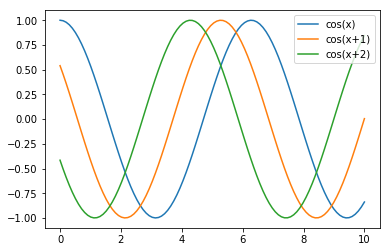

### Random Walk Simulation

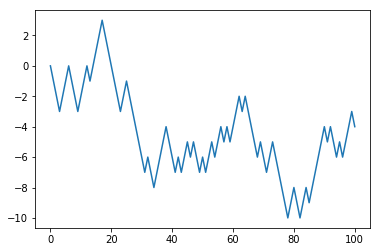

### Intro to Sympy

Sympy is a python library for symbolic mathematics, what this means is that we can solve complex calculus, linear algebra equations etc. using their exact mathematical representations.  

In [16]:
import sympy as sy

Variables in sympy must be defined as follows before being used in an equation.

Initial equation : x + 2*y
Equation with a new term: x + 2*y + 45
Equation with the x term removed: 2*y


To obtain the derivative of a function, in sympy we can simply use the inbuilt differentiation function. A similar inbuilt function can also be used to calculate the integral of a given equation.

cos(x)

We can also solve ordinary differential equations such as:  $$ y″− y = e^t $$ in the following manner

Eq(y(t), (C1 + t)*exp(t))

Similarly to solve an algebraic equation such as: $$ {x^2} = 1  $$ we can use the inbuilt solve function once we have sucessfully declared the variables and the equation itself.

[-1, 1]

In order to evaluate an equation using a given set of values we use the evalf method.

24.0000000000000

### Excercise 1:
Compute the integration of the following expression:$$\int(e^{x}sin(x)+e^{x}cos(x))dx$$

In [ ]:
## Enter code here ##

### Excercise 2:
Evaluate the obtained solution of the above equation for x = 2

In [19]:
## Enter code here ##